In [1]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-21 13:15:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3% 2.71M 0s
    50K .......... .......... .......... .......... ..........  7% 33.9M 0s
   100K .......... .......... .......... .......... .......... 10% 2.84M 0s
   150K .......... .......... .......... .......... .......... 14% 10.6M 0s
   200K .......... .......... .......... .......... .......... 17% 14.2M 0s
   250K .......... .......... .......... .......... .......... 21% 2.47M 0s
   300K .......... .......... .......... .......... .......... 25% 13.9M 0s
   350K .......... .......... ..

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Data preparation

In [7]:
#Select only the features from above and fill in the missing values with 0.
df_hw3 = df.fillna(0).copy()
df_hw3.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
count = (df_hw3['total_bedrooms'] == 0).sum()
print('Count of zeros in Column  total_bedrooms : ', count)

Count of zeros in Column  total_bedrooms :  207


In [9]:
#Replace all capitals with small and whitespaces with '_'
df_hw3.columns = df_hw3.columns.str.lower().str.replace(' ', '_')

string_columns = list(df_hw3.dtypes[df_hw3.dtypes == 'object'].index)

for col in string_columns:
    df_hw3[col] = df_hw3[col].str.lower().str.replace(' ', '_')

In [10]:
#Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
count = (df_hw3['households'] == 0).sum()
print('Count of zeros in Column  households : ', count)

Count of zeros in Column  households :  0


In [11]:
df_hw3['rooms_per_household'] = df_hw3 ['total_rooms']/ df_hw3['households']
df_hw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_rooms          20640 non-null  float64
 4   total_bedrooms       20640 non-null  float64
 5   population           20640 non-null  float64
 6   households           20640 non-null  float64
 7   median_income        20640 non-null  float64
 8   median_house_value   20640 non-null  float64
 9   ocean_proximity      20640 non-null  object 
 10  rooms_per_household  20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


## Feature Engineering

In [12]:
#Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
count = (df_hw3['total_rooms'] == 0).sum()
print('Count of zeros in Column  total_rooms : ', count)

Count of zeros in Column  total_rooms :  0


In [13]:
df_hw3['bedrooms_per_room'] = df_hw3 ['total_bedrooms']/ df_hw3['total_rooms']
df_hw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_rooms          20640 non-null  float64
 4   total_bedrooms       20640 non-null  float64
 5   population           20640 non-null  float64
 6   households           20640 non-null  float64
 7   median_income        20640 non-null  float64
 8   median_house_value   20640 non-null  float64
 9   ocean_proximity      20640 non-null  object 
 10  rooms_per_household  20640 non-null  float64
 11  bedrooms_per_room    20640 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [14]:
#Create a new column population_per_household by dividing the column population by the column households from dataframe.
#We have already checked zeroes in 'households'
df_hw3['population_per_household'] = df_hw3 ['population']/ df_hw3['households']
df_hw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


# Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [15]:
df_hw3['ocean_proximity'].value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

- Answer for question 1 is <1h_ocean 

## Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train_test_split?

In [18]:
df_train_full, df_test = train_test_split(df_hw3, test_size=0.2, random_state=42)

The df_train_full has 80% of all data we need to create df_train 60% of all data and df_val 20% of all data.
The proportion is 20/80=0.25 which means 25% of df_train_full(80% of all data) makes 20% of all data for df_val

In [19]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [20]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [21]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [22]:
#reset and drop index
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(df_train.shape, df_val.shape, df_test.shape, df_train_full.shape)
print(y_train.shape, y_val.shape, y_test.shape)
df_train.head()

(12384, 12) (4128, 12) (4128, 12) (16512, 13)
(12384,) (4128,) (4128,)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456


# Question 2 Correlation Matrix

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?<br>
<br>
Options:<br>
<br>
- total_bedrooms and households
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms

In [23]:
df_train_full.corrwith(df_train_full.median_house_value)

longitude                  -0.046349
latitude                   -0.142983
housing_median_age          0.103706
total_rooms                 0.133989
total_bedrooms              0.047980
population                 -0.026032
households                  0.063714
median_income               0.690647
median_house_value          1.000000
rooms_per_household         0.158485
bedrooms_per_room          -0.257419
population_per_household   -0.022030
dtype: float64

based on: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [24]:
df_train_full_num = df_train_full.drop(columns=['ocean_proximity']).copy()

In [25]:
df_train_full_num.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349,-0.029339,0.097280,-0.000598
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983,0.110695,-0.118938,0.005837
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706,-0.160892,0.135495,0.016245
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989,0.136090,-0.189316,-0.024991
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980,-0.001659,0.084149,-0.028536
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032,-0.073733,0.035134,0.072330
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714,-0.083062,0.064185,-0.027656
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647,0.336013,-0.616669,0.022061
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000,0.158485,-0.257419,-0.022030
rooms_per_household,-0.029339,0.110695,-0.160892,0.136090,-0.001659,-0.073733,-0.083062,0.336013,0.158485,1.000000,-0.435169,-0.004922


In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [27]:
labels_to_drop = get_redundant_pairs(df_train_full_num)
corr_val = df_train_full.corr().abs().unstack().sort_values(ascending=False)
corr_val = corr_val.drop(labels=labels_to_drop)

In [28]:
print("Top Absolute Correlations\n","\n", corr_val[0:5])

Top Absolute Correlations
 
 total_bedrooms  households        0.980255
total_rooms     total_bedrooms    0.930489
longitude       latitude          0.924485
total_rooms     households        0.920482
population      households        0.907452
dtype: float64


- Answer for Question 2 is total_bedrooms / households        0.980255

### Make median_house_value binary<br>
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [29]:
df_train_full['above_average'] = (df_train_full['median_house_value']>df_train_full['median_house_value'].mean()).astype(int)

In [30]:
y_train_cat = (y_train > y_train.mean()).astype(int)
y_val_cat = (y_val > y_train.mean()).astype(int)
y_test_cat = (y_test > y_train.mean()).astype(int)

In [31]:
df_train_full.above_average.value_counts(normalize=True)

0    0.593144
1    0.406856
Name: above_average, dtype: float64

# Question 3 Mutual Information

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)<br>
<br>
Options:<br>
- 0.263
- 0.00001
- 0.101
- 0.15555

In [32]:
from sklearn.metrics import mutual_info_score

In [33]:
mut_score = mutual_info_score(df_train_full.above_average, df_train_full.ocean_proximity)
print(mut_score)

0.1014306752368672


In [34]:
print(round(mut_score, 2))

0.1


- Answer for Question 3 is 0.10

# Question 4 Logistic Regression and Accuracy

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.<br>
<br>
Options:<br>

- 0.60
- 0.72
- 0.84
- 0.95

## one-hot encoding

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
df_train_full.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int32
dtype: object

In [37]:
#we have one categorical variable ocean_proximity in the data. 
#Include it using one-hot encoding.
train_dict = df_train.to_dict(orient='records')

In [38]:
train_dict[0]

{'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1h_ocean',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [39]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [40]:
X_train = dv.transform(train_dict)

In [41]:
X_train.shape

(12384, 16)

In [42]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1h_ocean', 'ocean_proximity=inland',
       'ocean_proximity=island', 'ocean_proximity=near_bay',
       'ocean_proximity=near_ocean', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

## Training logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
y_train

array([241400., 500001.,  64100., ..., 215300., 139000., 181300.])

In [45]:
y_train_cat

array([1, 1, 0, ..., 1, 0, 0])

In [46]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train_cat)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [47]:
model.coef_[0].round(3) #weights w

array([ 0.113,  0.004,  0.036,  0.103,  0.083,  1.196,  0.452, -1.599,
        0.012,  0.309,  0.763, -0.002,  0.01 , -0.014,  0.002, -0.   ])

### Calculate the accuracy on the validation dataset and round it to 2 decimal digits

In [48]:
#Validation set one-hot encoding
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

### Prediction

In [49]:
model.predict_proba(X_val)

array([[0.91245709, 0.08754291],
       [0.84006404, 0.15993596],
       [0.04791432, 0.95208568],
       ...,
       [0.04120502, 0.95879498],
       [0.15063196, 0.84936804],
       [0.52768249, 0.47231751]])

In [53]:
y_pred_soft = model.predict_proba(X_val)[:, 1]
y_pred_soft

array([0.08754291, 0.15993596, 0.95208568, ..., 0.95879498, 0.84936804,
       0.47231751])

In [54]:
y_pred_hard = model.predict(X_val)
y_pred_hard

array([0, 0, 1, ..., 1, 1, 0])

### Accuracy

In [55]:
above_avg_pred = (y_pred_soft>=0.5)

In [78]:
model_acc = (y_val_cat == above_avg_pred).mean()
model_acc

0.8359980620155039

In [57]:
(y_val_cat == y_pred_hard).mean()

0.8359980620155039

In [58]:
(y_val_cat == above_avg_pred).mean().round(2)

0.84

- Answer for Question 4 is 0.84

In [59]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_soft
df_pred['prediction'] = above_avg_pred.astype(int)
df_pred['actual'] = y_val_cat

In [60]:
df_pred

,probability,prediction,actual
0,0.087543,0,0
1,0.159936,0,0
2,0.952086,1,1
3,0.492404,0,1
4,0.979478,1,1
...,...,...,...
4123,0.052485,0,0
4124,0.986704,1,1
4125,0.958795,1,1
4126,0.849368,1,1


In [61]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [62]:
df_pred

,probability,prediction,actual,correct
0,0.087543,0,0,True
1,0.159936,0,0,True
2,0.952086,1,1,True
3,0.492404,0,1,False
4,0.979478,1,1,True
...,...,...,...,...
4123,0.052485,0,0,True
4124,0.986704,1,1,True
4125,0.958795,1,1,True
4126,0.849368,1,1,True


### Sigmoid

In [66]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [73]:
z = np.linspace(-7, 7, 51)
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

In [74]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

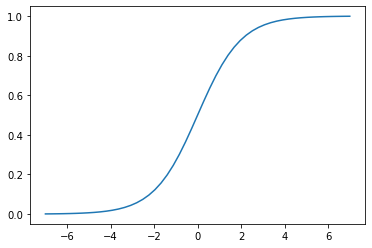

In [75]:
plt.plot(z, sigmoid(z))

In [76]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [77]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

# Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households
<br>note: the difference doesn't have to be positive

In [63]:
w0 = model.intercept_[0]
w0 #bayes

-0.06226206219069978

In [64]:
w = model.coef_[0]
w.round(3)

array([ 0.113,  0.004,  0.036,  0.103,  0.083,  1.196,  0.452, -1.599,
        0.012,  0.309,  0.763, -0.002,  0.01 , -0.014,  0.002, -0.   ])

In [65]:
dict(zip(dv.get_feature_names_out(), w.round(3)))

{'bedrooms_per_room': 0.113,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.103,
 'longitude': 0.083,
 'median_income': 1.196,
 'ocean_proximity=<1h_ocean': 0.452,
 'ocean_proximity=inland': -1.599,
 'ocean_proximity=island': 0.012,
 'ocean_proximity=near_bay': 0.309,
 'ocean_proximity=near_ocean': 0.763,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.014,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

In [93]:
def one_hot_enc(df):
    train_dict = df.to_dict(orient='records')
    X = dv.transform(train_dict)
    
    return X

In [94]:
# from sklearn.preprocessing import OneHotEncoder

In [95]:
# features = ['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
# features_ex_total_rooms = features.remove('total_rooms')

# df_train_ex_total_rooms = df_train.drop(columns=['total_rooms']).copy()
# X_train_ex_total_rooms = OneHotEncoder(sparse=False).fit(df_train_ex_total_rooms)
# X_train_ex_total_rooms = X_train_ex_total_rooms.transform(np.array(features_ex_total_rooms))
# X_train_ex_total_rooms

#### Excluding total_rooms

In [110]:
df_train_ex_total_rooms = df_train.drop(columns=['total_rooms']).copy()

X_train_ex_total_rooms = one_hot_enc(df_train_ex_total_rooms)
X_train_ex_total_rooms


array([[2.59713701e-01, 3.74000000e+02, 3.90000000e+01, ...,
        3.92245989e+00, 3.81000000e+02, 0.00000000e+00],
       [1.30227981e-01, 8.06000000e+02, 2.40000000e+01, ...,
        7.56451613e+00, 7.94000000e+02, 0.00000000e+00],
       [2.34624146e-01, 3.37000000e+02, 4.10000000e+01, ...,
        3.90801187e+00, 3.09000000e+02, 0.00000000e+00],
       ...,
       [1.82879377e-01, 6.02000000e+02, 1.80000000e+01, ...,
        5.54983389e+00, 6.11000000e+02, 0.00000000e+00],
       [2.29126214e-01, 3.50000000e+02, 1.60000000e+01, ...,
        4.41428571e+00, 3.54000000e+02, 0.00000000e+00],
       [2.09574468e-01, 2.15000000e+02, 3.50000000e+01, ...,
        4.37209302e+00, 1.97000000e+02, 0.00000000e+00]])

In [111]:
model_ex_total_rooms = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_ex_total_rooms.fit(X_train_ex_total_rooms, y_train_cat)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [112]:
df_val_ex_total_rooms = df_val.drop(columns=['total_rooms']).copy()

X_val_ex_total_rooms = one_hot_enc(df_val_ex_total_rooms)
X_val_ex_total_rooms


array([[1.59529807e-01, 1.82000000e+02, 3.50000000e+01, ...,
        6.54395604e+00, 1.90000000e+02, 0.00000000e+00],
       [2.30263158e-01, 3.90000000e+02, 2.30000000e+01, ...,
        4.28717949e+00, 3.85000000e+02, 0.00000000e+00],
       [2.69762211e-01, 1.58900000e+03, 1.40000000e+01, ...,
        3.91692889e+00, 1.67900000e+03, 0.00000000e+00],
       ...,
       [1.70779221e-01, 5.82000000e+02, 3.10000000e+01, ...,
        5.29209622e+00, 5.26000000e+02, 0.00000000e+00],
       [1.79687500e-01, 6.32000000e+02, 3.40000000e+01, ...,
        5.87341772e+00, 6.67000000e+02, 0.00000000e+00],
       [1.79974651e-01, 2.92000000e+02, 3.20000000e+01, ...,
        5.40410959e+00, 2.84000000e+02, 0.00000000e+00]])

In [113]:
y_pred_ex_tr = model_ex_total_rooms.predict(X_val_ex_total_rooms)
acc_model_ex_total_rooms = (y_val_cat == y_pred_ex_tr).mean()
print(acc_model_ex_total_rooms)
print(model_acc)
print(model_acc - acc_model_ex_total_rooms)

0.8367248062015504
0.8359980620155039
-0.0007267441860465684


#### Excluding total_bedrooms

In [114]:
df_train_ex_total_bedrooms = df_train.drop(columns=['total_bedrooms']).copy()

X_train_ex_total_bedrooms = one_hot_enc(df_train_ex_total_bedrooms)

In [115]:
model_ex_total_bedrooms = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_ex_total_bedrooms.fit(X_train_ex_total_bedrooms, y_train_cat)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [116]:
df_val_ex_total_bedrooms = df_val.drop(columns=['total_bedrooms']).copy()

X_val_ex_total_bedrooms = one_hot_enc(df_val_ex_total_bedrooms)

y_pred_ex_tb = model_ex_total_bedrooms.predict(X_val_ex_total_bedrooms)
acc_model_ex_total_bedrooms = (y_val_cat == y_pred_ex_tb).mean()
print(acc_model_ex_total_bedrooms)
print(model_acc)
print(model_acc - acc_model_ex_total_bedrooms)

0.8357558139534884
0.8359980620155039
0.0002422480620154488


#### Excluding population

In [118]:
df_train_ex_population = df_train.drop(columns=['population']).copy()

X_train_ex_population = one_hot_enc(df_train_ex_population)

model_ex_population = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_ex_population.fit(X_train_ex_population, y_train_cat)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [119]:
df_val_ex_population = df_val.drop(columns=['population']).copy()

X_val_ex_population = one_hot_enc(df_val_ex_population)

y_pred_ex_pop = model_ex_total_bedrooms.predict(X_val_ex_population)
acc_model_ex_population = (y_val_cat == y_pred_ex_pop).mean()
print(acc_model_ex_population)
print(model_acc)
print(model_acc - acc_model_ex_population)

0.6620639534883721
0.8359980620155039
0.17393410852713176


#### Excluding households

In [120]:
df_train_ex_households = df_train.drop(columns=['households']).copy()

X_train_ex_households = one_hot_enc(df_train_ex_households)

model_ex_households = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_ex_households.fit(X_train_ex_households, y_train_cat)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [121]:
df_val_ex_households = df_val.drop(columns=['households']).copy()

X_val_ex_households = one_hot_enc(df_val_ex_households)

y_pred_ex_h = model_ex_total_bedrooms.predict(X_val_ex_households)
acc_model_ex_households = (y_val_cat == y_pred_ex_h).mean()
print(acc_model_ex_households)
print(model_acc)
print(model_acc - acc_model_ex_households)

0.6991279069767442
0.8359980620155039
0.13687015503875966


- Answer for Question 5 is total_rooms -0.0007267441860465684

# Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.
<br>
Options:<br>
<br>
- 0
- 0.01
- 0.1
- 1
- 10

In [122]:
y_train

array([241400., 500001.,  64100., ..., 215300., 139000., 181300.])

In [123]:
#Apply the logarithmic transformation to the original column 'median_house_value'column.
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

y_train

array([12.39421473, 13.12236738, 11.06821524, ..., 12.27979233,
       11.84223641, 12.10791391])

In [124]:
from sklearn.linear_model import Ridge

In [125]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [133]:
#Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data
for a in [0, 0.01, 0.1, 1, 10]:
    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_val)
    print('alpha = %.2f, val rmse: %.12f' % (a, rmse(y_val, y_pred)))

alpha = 0.00, val rmse: 0.524063570702
alpha = 0.01, val rmse: 0.524063570719
alpha = 0.10, val rmse: 0.524063570881
alpha = 1.00, val rmse: 0.524063572516
alpha = 10.00, val rmse: 0.524063588833


In [138]:
#Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data
for a in [0, 0.01, 0.1, 1, 10]:
    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_val)
    print('alpha = %.5s, val rmse: %.3f' % (a, rmse(y_val, y_pred)))

alpha = 0, val rmse: 0.524
alpha = 0.01, val rmse: 0.524
alpha = 0.1, val rmse: 0.524
alpha = 1, val rmse: 0.524
alpha = 10, val rmse: 0.524


- Answer for Question 6 is alpha = 0, val rmse: 0.524